# Detection of Dental Caries using Image Processing and Transfer Learning

**British university in Egypt** \\
*ICS*

---

### STUDENT DETAIL:
- **Omar Islam**
  - Email: omar219127@bue.edu.eg
  - Student ID: 219127


---


## Loading the dataset using Kaggle API

In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kello101","key":"1b42d0e86b16d07cbecb8302ca874d9f"}'}

In [ ]:
!mv kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d snginh/teethdecay

Dataset URL: https://www.kaggle.com/datasets/snginh/teethdecay
License(s): other
teethdecay.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/teethdecay.zip

Archive:  /content/teethdecay.zip
replace teeth_dataset/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Imports needed in the code

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

from tensorflow import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.18.0
Keras version: 3.10.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os
train_path = "/content/teeth_dataset/train/"
test_path = "/content/teeth_dataset/test"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

## Getting contents of training data

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 945/945 [00:00<00:00, 1664.34it/s]


In [ ]:
data.shape

(1260, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'no-caries': 315, 'caries': 945})

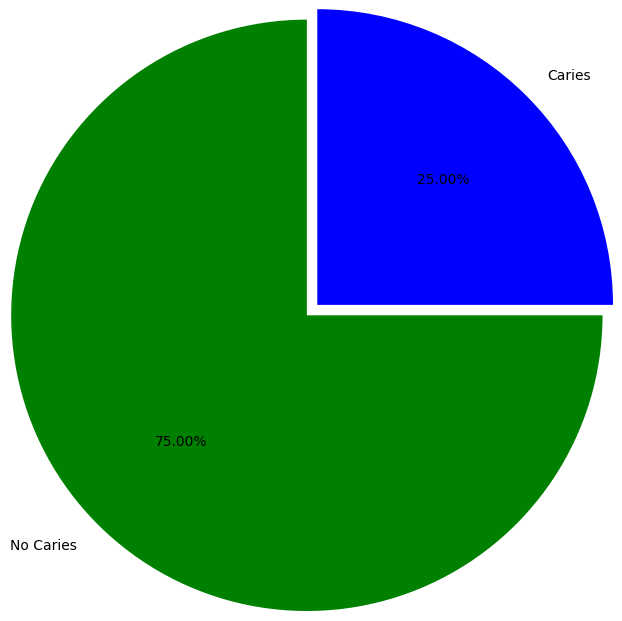

In [ ]:
colors = ['green','blue']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',labels=['No Caries', 'Caries'], colors= colors,radius=2)
plt.show()

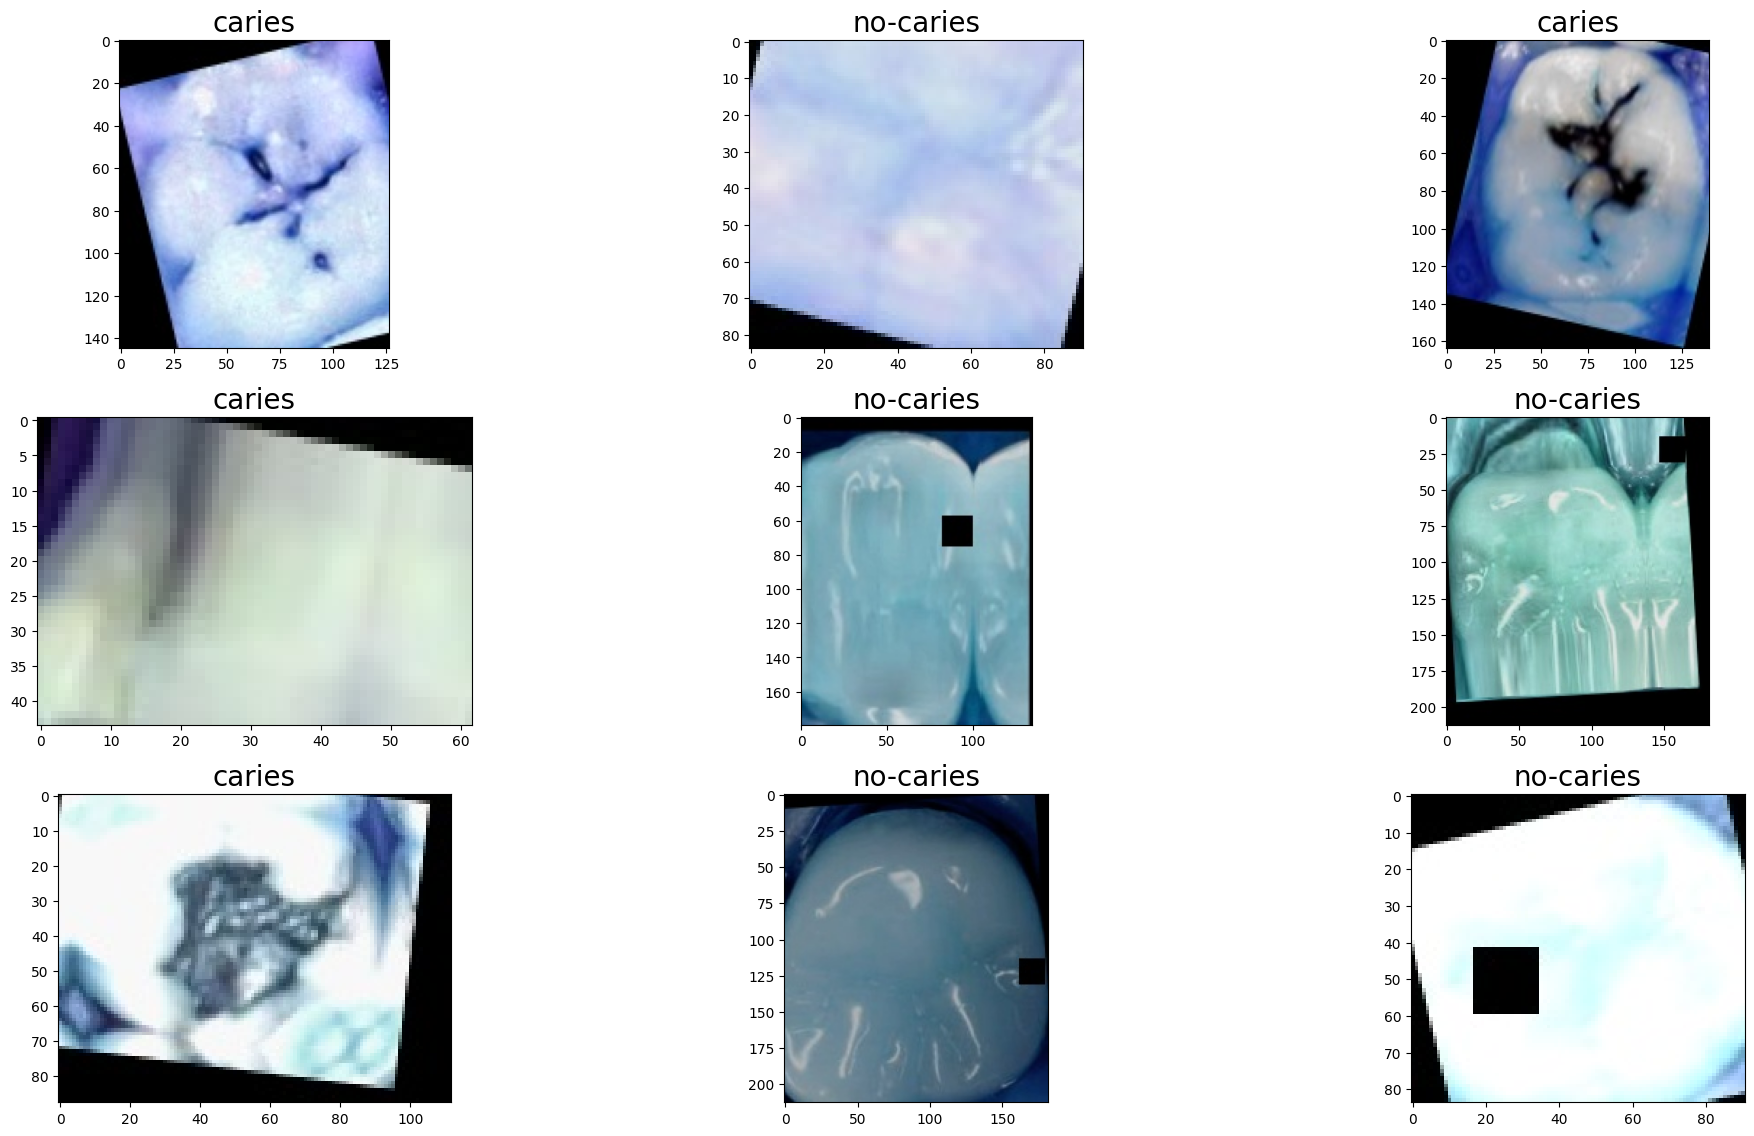

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(1000)
    plt.title('{0}'.format(data.label[index]),fontdict={'size':20})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


## Getting contents of testing data

In [ ]:
x_data = []
y_data = []

for category in glob(test_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 210/210 [00:00<00:00, 2097.92it/s]


In [ ]:
data.shape

(294, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'no-caries': 84, 'caries': 210})

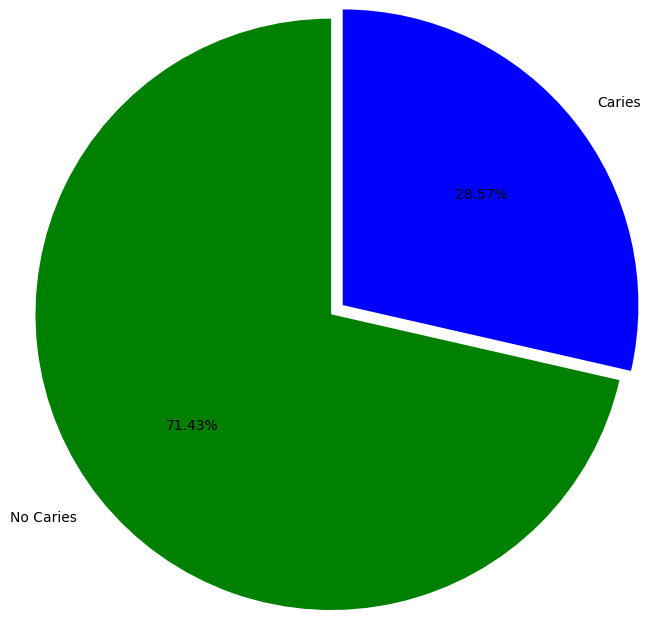

In [ ]:
colors = ['green','blue']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',labels=['No Caries', 'Caries'], colors= colors,radius=2)
plt.show()

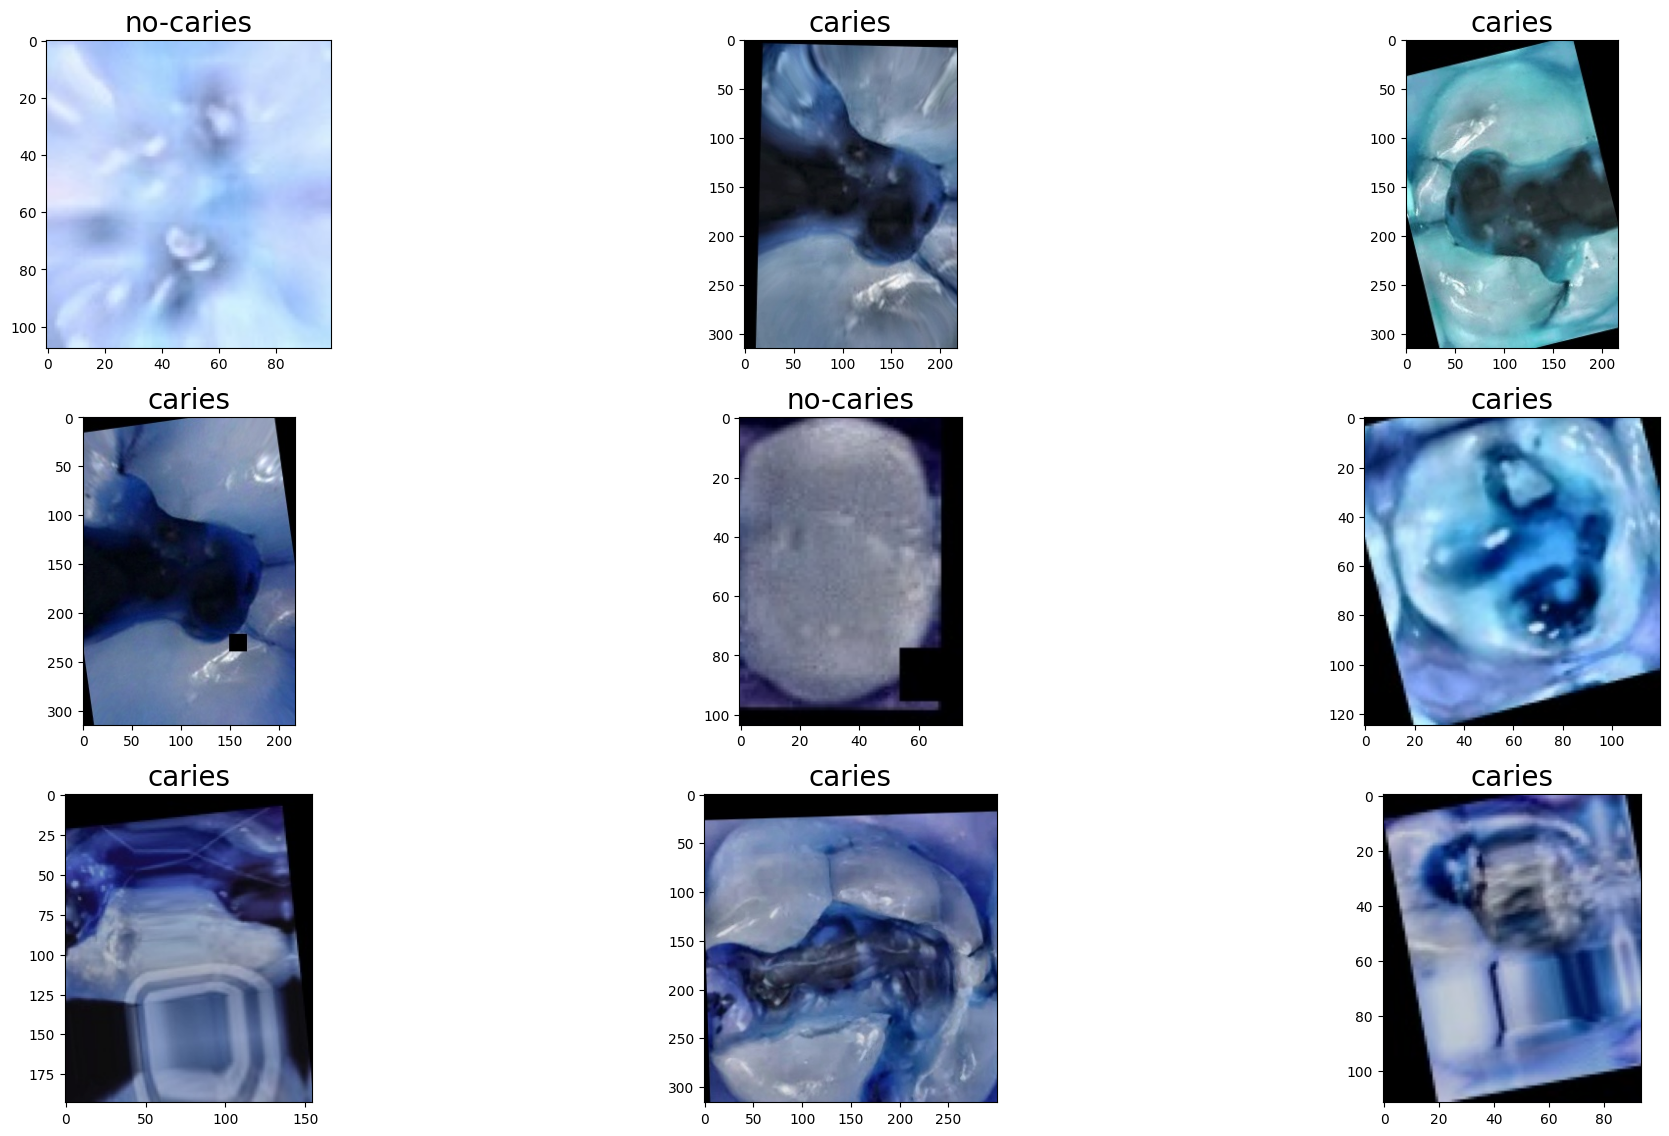

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(294)
    plt.title('{0}'.format(data.label[index]),fontdict={'size':20})
    plt.imshow(data.image[index])
    plt.tight_layout()

## 1. Model Building

### Image Augmentation

In [ ]:
train_generator = ImageDataGenerator(
    rescale = 1.0/255.,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    brightness_range=(0.5, 1.5),
)
test_generator = ImageDataGenerator(rescale=1./255.)

In [ ]:
train_datagen = train_generator.flow_from_directory(
    train_path,
    batch_size=10,
    target_size=(96, 96)
)
test_datagen = test_generator.flow_from_directory(
    test_path,
    batch_size=10,
    target_size=(96, 96)
)

Found 1260 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


### Proposed CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(96, 96, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

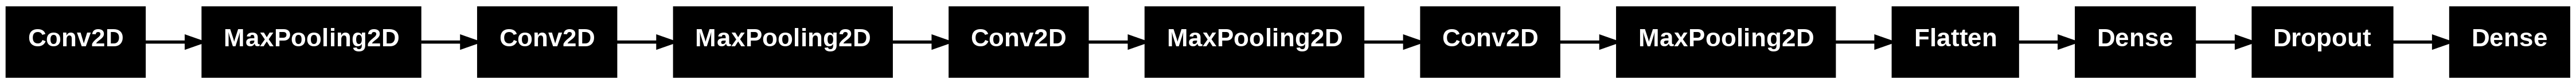

In [ ]:
plot_model(model, rankdir = "LR")

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_98 (Conv2D)              │ (None, 94, 94, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 45, 45, 96)     │        27,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 22, 22, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 20, 20, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,337,058 (5.10 MB)

 Trainable params: 1,337,058 (5.10 MB)

 Non-trainable params: 0 (0.00 B)

#### Main Model fit

In [ ]:
hist_cnn = model.fit(train_datagen,epochs=20,validation_data = test_datagen)

Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 38s 285ms/step - accuracy: 0.7335 - loss: 0.6057 - val_accuracy: 0.7143 - val_loss: 0.5536
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 35s 276ms/step - accuracy: 0.7499 - loss: 0.5337 - val_accuracy: 0.7211 - val_loss: 0.3415
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 34s 272ms/step - accuracy: 0.7665 - loss: 0.4899 - val_accuracy: 0.7381 - val_loss: 0.4029
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 37s 292ms/step - accuracy: 0.7489 - loss: 0.4772 - val_accuracy: 0.8027 - val_loss: 0.3580
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 34s 266ms/step - accuracy: 0.7771 - loss: 0.4378 - val_accuracy: 0.7789 - val_loss: 0.4230
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 35s 276ms/step - accuracy: 0.7779 - loss: 0.4566 - val_accuracy: 0.8367 - val_loss: 0.3356
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 35s 276ms/step - accuracy: 0.8152 - loss: 0.4037 - val_accuracy: 0.8095 - val_loss: 0.3347
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 34s 266ms/step - accuracy: 0.7916 - loss: 0

## Transfer Learning

### ResNet101V2

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import ResNet101V2

base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_res = Model(inputs=base_model.input, outputs=predictions)

model_res.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_res = model_res.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 121s 818ms/step - accuracy: 0.7115 - loss: 0.9208 - val_accuracy: 0.8299 - val_loss: 0.4123
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 97s 768ms/step - accuracy: 0.8173 - loss: 0.4968 - val_accuracy: 0.8027 - val_loss: 0.4508
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 98s 779ms/step - accuracy: 0.7955 - loss: 0.4957 - val_accuracy: 0.8503 - val_loss: 0.3415
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 97s 767ms/step - accuracy: 0.8033 - loss: 0.4507 - val_accuracy: 0.7959 - val_loss: 0.3550
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 99s 783ms/step - accuracy: 0.8271 - loss: 0.3979 - val_accuracy: 0.8435 - val_loss: 0.3218
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 97s 768ms/step - accuracy: 0.8372 - loss: 0.3885 - val_accuracy: 0.8673 - val_loss: 0.3406
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 101s 803ms/step - accuracy: 0.8341 - loss: 0.3891 - val_accuracy: 0.7959 - val_loss: 0.3352
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 101s 806ms/step - accuracy: 0.8376 - loss

### InceptionV3

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_inc = Model(inputs=base_model.input, outputs=predictions)

model_inc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_inc = model_inc.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 46s 283ms/step - accuracy: 0.6824 - loss: 0.9952 - val_accuracy: 0.7483 - val_loss: 0.5663
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 254ms/step - accuracy: 0.7250 - loss: 0.5873 - val_accuracy: 0.7721 - val_loss: 0.4798
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 254ms/step - accuracy: 0.7668 - loss: 0.5214 - val_accuracy: 0.7755 - val_loss: 0.4986
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 43s 269ms/step - accuracy: 0.8018 - loss: 0.5005 - val_accuracy: 0.7823 - val_loss: 0.4585
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.8113 - loss: 0.4457 - val_accuracy: 0.7619 - val_loss: 0.4787
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 33s 262ms/step - accuracy: 0.7945 - loss: 0.4700 - val_accuracy: 0.7619 - val_loss: 0.4948
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 32s 252ms/step - accuracy: 0.8257 - loss: 0.4364 - val_accuracy: 0.7721 - val_loss: 0.4671
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 33s 261ms/step - accuracy: 0.7986 - loss: 0

### MobileNetV2

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_mob = Model(inputs=base_model.input, outputs=predictions)

model_mob.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_mob = model_mob.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 27s 144ms/step - accuracy: 0.7193 - loss: 0.7981 - val_accuracy: 0.7925 - val_loss: 0.4267
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.7787 - loss: 0.4668 - val_accuracy: 0.8333 - val_loss: 0.3921
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - accuracy: 0.8325 - loss: 0.3881 - val_accuracy: 0.8469 - val_loss: 0.3565
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.8346 - loss: 0.3954 - val_accuracy: 0.8435 - val_loss: 0.3574
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 16s 129ms/step - accuracy: 0.8212 - loss: 0.4097 - val_accuracy: 0.8435 - val_loss: 0.3540
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - accuracy: 0.8378 - loss: 0.3340 - val_accuracy: 0.8401 - val_loss: 0.3761
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - accuracy: 0.8372 - loss: 0.3447 - val_accuracy: 0.8537 - val_loss: 0.3375
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 17s 133ms/step - accuracy: 0.8406 - loss: 0

### VGG16

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_vgg = Model(inputs=base_model.input, outputs=predictions)

model_vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_vgg = model_vgg.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.6981 - loss: 0.6338 - val_accuracy: 0.7143 - val_loss: 0.4753
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.7493 - loss: 0.5099 - val_accuracy: 0.7347 - val_loss: 0.4771
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.7801 - loss: 0.4639 - val_accuracy: 0.8129 - val_loss: 0.4233
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.8015 - loss: 0.4282 - val_accuracy: 0.8061 - val_loss: 0.4329
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.8206 - loss: 0.4002 - val_accuracy: 0.7721 - val_loss: 0.5099
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.8182 - loss: 0.3962 - val_accuracy: 0.7415 - val_loss: 0.5187
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - accuracy: 0.8003 - loss: 0.4158 - val_accuracy: 0.8163 - val_loss: 0.4266
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.8256 - loss: 0.3906 - val_accu

## 2. Different Image Size (128 x 128)

In [ ]:
train_datagen = train_generator.flow_from_directory(
    train_path,
    batch_size=10,
    target_size=(128, 128)
)
test_datagen = test_generator.flow_from_directory(
    test_path,
    batch_size=10,
    target_size=(128, 128)
)

Found 1260 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


### Proposed CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

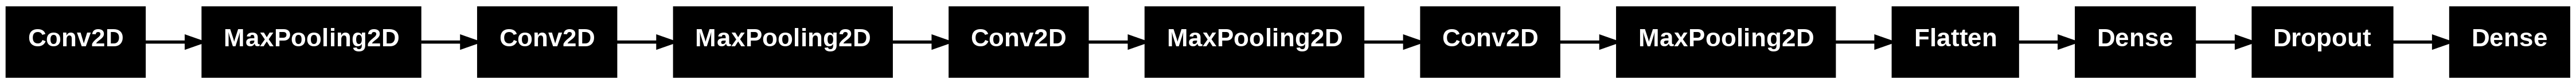

In [ ]:
plot_model(model, rankdir = "LR")

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_196 (Conv2D)             │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_197 (Conv2D)             │ (None, 61, 61, 96)     │        27,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 30, 30, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_198 (Conv2D)             │ (None, 28, 28, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_199 (Conv2D)             │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,647,778 (10.10 MB)

 Trainable params: 2,647,778 (10.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist_cnn2 = model.fit(train_datagen,epochs=20,validation_data = test_datagen)

Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 66s 498ms/step - accuracy: 0.7693 - loss: 0.5837 - val_accuracy: 0.7143 - val_loss: 0.5509
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 62s 493ms/step - accuracy: 0.7428 - loss: 0.5555 - val_accuracy: 0.7313 - val_loss: 0.4026
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 61s 484ms/step - accuracy: 0.7538 - loss: 0.5342 - val_accuracy: 0.7143 - val_loss: 0.4486
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 62s 492ms/step - accuracy: 0.7644 - loss: 0.4922 - val_accuracy: 0.7687 - val_loss: 0.4134
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 64s 507ms/step - accuracy: 0.7944 - loss: 0.4473 - val_accuracy: 0.7585 - val_loss: 0.3805
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 62s 495ms/step - accuracy: 0.7892 - loss: 0.4125 - val_accuracy: 0.8129 - val_loss: 0.3588
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 61s 487ms/step - accuracy: 0.7924 - loss: 0.4335 - val_accuracy: 0.8469 - val_loss: 0.3369
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 62s 493ms/step - accuracy: 0.8159 - loss: 0

## Transfer Learning after using different image size

### ResNet101V2

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import ResNet101V2

base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_res = Model(inputs=base_model.input, outputs=predictions)

model_res.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_res2 = model_res.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.6630 - loss: 0.9155 - val_accuracy: 0.7585 - val_loss: 0.4256
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.8047 - loss: 0.5012 - val_accuracy: 0.8401 - val_loss: 0.3687
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step - accuracy: 0.8307 - loss: 0.4351 - val_accuracy: 0.8401 - val_loss: 0.3413
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.8081 - loss: 0.4192 - val_accuracy: 0.7925 - val_loss: 0.3973
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.8516 - loss: 0.3679 - val_accuracy: 0.8435 - val_loss: 0.3173
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.8630 - loss: 0.3284 - val_accuracy: 0.8537 - val_loss: 0.3172
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 165s 1s/step - accuracy: 0.8640 - loss: 0.3483 - val_accuracy: 0.8197 - val_loss: 0.3513
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 167s 1s/step - accuracy: 0.8772 - loss: 0.3096 - val_accu

### InceptionV3

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_inc = Model(inputs=base_model.input, outputs=predictions)

model_inc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_inc2 = model_inc.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 83s 518ms/step - accuracy: 0.6562 - loss: 1.5626 - val_accuracy: 0.7143 - val_loss: 0.5631
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 81s 513ms/step - accuracy: 0.7266 - loss: 0.6325 - val_accuracy: 0.7211 - val_loss: 0.5462
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 61s 489ms/step - accuracy: 0.7607 - loss: 0.5146 - val_accuracy: 0.7755 - val_loss: 0.4762
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 81s 478ms/step - accuracy: 0.7718 - loss: 0.4773 - val_accuracy: 0.7517 - val_loss: 0.4913
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 59s 469ms/step - accuracy: 0.8031 - loss: 0.4618 - val_accuracy: 0.7721 - val_loss: 0.4441
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 62s 490ms/step - accuracy: 0.7992 - loss: 0.4427 - val_accuracy: 0.7857 - val_loss: 0.4379
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 59s 467ms/step - accuracy: 0.8208 - loss: 0.4271 - val_accuracy: 0.7857 - val_loss: 0.4342
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 60s 477ms/step - accuracy: 0.8187 - loss: 0

### MobileNetV2

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_mob = Model(inputs=base_model.input, outputs=predictions)

model_mob.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_mob2 = model_mob.fit(train_datagen, epochs=10, validation_data=test_datagen)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 34s 218ms/step - accuracy: 0.6528 - loss: 0.7967 - val_accuracy: 0.7619 - val_loss: 0.4618
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 40s 207ms/step - accuracy: 0.7578 - loss: 0.5140 - val_accuracy: 0.8299 - val_loss: 0.3964
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 206ms/step - accuracy: 0.8039 - loss: 0.4429 - val_accuracy: 0.7993 - val_loss: 0.4095
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 207ms/step - accuracy: 0.8138 - loss: 0.3925 - val_accuracy: 0.8265 - val_loss: 0.3967
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 208ms/step - accuracy: 0.8441 - loss: 0.3589 - val_accuracy: 0.8129 - val_loss: 0.3914
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 209ms/step - accuracy: 0.8503 - loss: 0.3640 - val_accuracy: 0.7959 - val_loss: 0.3837
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 27s 213ms/step - accuracy: 0.8609 - loss: 0.3248 - val_accuracy: 0.8061 - val_loss: 0.4199
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━

### VGG16

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_vgg = Model(inputs=base_model.input, outputs=predictions)

model_vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_vgg2 = model_vgg.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 313s 2s/step - accuracy: 0.7159 - loss: 0.6090 - val_accuracy: 0.7143 - val_loss: 0.5143
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.7723 - loss: 0.4833 - val_accuracy: 0.7653 - val_loss: 0.4843
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.7890 - loss: 0.4598 - val_accuracy: 0.7925 - val_loss: 0.4182
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.8117 - loss: 0.4040 - val_accuracy: 0.8027 - val_loss: 0.4178
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 301s 2s/step - accuracy: 0.8404 - loss: 0.3747 - val_accuracy: 0.8231 - val_loss: 0.3813
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.8419 - loss: 0.3473 - val_accuracy: 0.8163 - val_loss: 0.3859
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.8403 - loss: 0.3588 - val_accuracy: 0.8435 - val_loss: 0.3723
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.8272 - loss: 0.3522 - val_accu

## 3. Different Image Size (192 x 192)

In [ ]:
train_datagen = train_generator.flow_from_directory(
    train_path,
    batch_size=10,
    target_size=(192, 192)
)
test_datagen = test_generator.flow_from_directory(
    test_path,
    batch_size=10,
    target_size=(192, 192)
)

Found 1260 images belonging to 2 classes.
Found 294 images belonging to 2 classes.


### Proposed CNN Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(192, 192, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(96, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

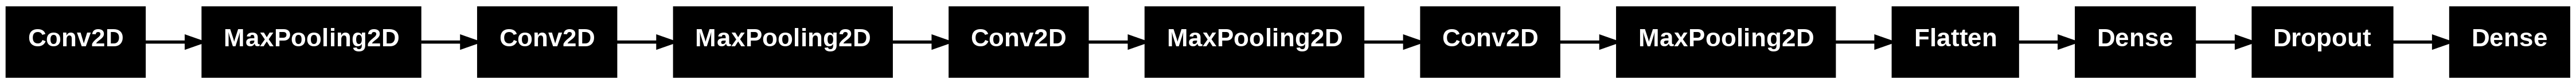

In [ ]:
plot_model(model, rankdir = "LR")

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_388 (Conv2D)             │ (None, 190, 190, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 95, 95, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_389 (Conv2D)             │ (None, 93, 93, 96)     │        27,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 46, 46, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_390 (Conv2D)             │ (None, 44, 44, 128)    │       110,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_391 (Conv2D)             │ (None, 20, 20, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,842,082 (26.10 MB)

 Trainable params: 6,842,082 (26.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist_cnn3 = model.fit(train_datagen,epochs=20,validation_data = test_datagen)

Epoch 1/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7353 - loss: 0.8285 - val_accuracy: 0.7143 - val_loss: 0.5943
Epoch 2/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.7218 - loss: 0.6035 - val_accuracy: 0.7143 - val_loss: 0.5585
Epoch 3/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7400 - loss: 0.5614 - val_accuracy: 0.7143 - val_loss: 0.4129
Epoch 4/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - accuracy: 0.7315 - loss: 0.5281 - val_accuracy: 0.7143 - val_loss: 0.5725
Epoch 5/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7482 - loss: 0.4870 - val_accuracy: 0.7313 - val_loss: 0.4244
Epoch 6/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7859 - loss: 0.4545 - val_accuracy: 0.8333 - val_loss: 0.3481
Epoch 7/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7683 - loss: 0.4773 - val_accuracy: 0.7415 - val_loss: 0.4137
Epoch 8/20
126/126 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7810 - loss: 0.4437 - val_accu

## Transfer Learning

### ResNet101V2

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet_v2 import ResNet101V2

base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_res = Model(inputs=base_model.input, outputs=predictions)

model_res.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_res3 = model_res.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.7197 - loss: 0.8538 - val_accuracy: 0.8061 - val_loss: 0.4563
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 360s 3s/step - accuracy: 0.8063 - loss: 0.4592 - val_accuracy: 0.8265 - val_loss: 0.3356
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step - accuracy: 0.8229 - loss: 0.4133 - val_accuracy: 0.8231 - val_loss: 0.3667
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 397s 3s/step - accuracy: 0.8615 - loss: 0.3809 - val_accuracy: 0.8469 - val_loss: 0.3076
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 357s 3s/step - accuracy: 0.8315 - loss: 0.3431 - val_accuracy: 0.8027 - val_loss: 0.5412
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.8827 - loss: 0.3009 - val_accuracy: 0.8435 - val_loss: 0.3324
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 356s 3s/step - accuracy: 0.8777 - loss: 0.2859 - val_accuracy: 0.8197 - val_loss: 0.4065
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 374s 3s/step - accuracy: 0.8840 - loss: 0.2659 - val_accu

### InceptionV3

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_inc = Model(inputs=base_model.input, outputs=predictions)

model_inc.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_inc3 = model_inc.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.6534 - loss: 1.0809 - val_accuracy: 0.7143 - val_loss: 0.5770
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7455 - loss: 0.6054 - val_accuracy: 0.7245 - val_loss: 0.5258
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 162s 1s/step - accuracy: 0.7704 - loss: 0.5298 - val_accuracy: 0.7313 - val_loss: 0.4624
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7854 - loss: 0.4849 - val_accuracy: 0.8061 - val_loss: 0.4184
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7960 - loss: 0.4397 - val_accuracy: 0.7585 - val_loss: 0.4374
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.7781 - loss: 0.4777 - val_accuracy: 0.8265 - val_loss: 0.3808
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.8148 - loss: 0.3999 - val_accuracy: 0.8333 - val_loss: 0.3681
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.7945 - loss: 0.4108 - val_accu

### MobileNetV2

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_mob = Model(inputs=base_model.input, outputs=predictions)

model_mob.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_mob3 = model_mob.fit(train_datagen, epochs=10, validation_data=test_datagen)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 69s 491ms/step - accuracy: 0.7095 - loss: 0.8020 - val_accuracy: 0.7211 - val_loss: 0.5851
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 57s 456ms/step - accuracy: 0.7953 - loss: 0.4514 - val_accuracy: 0.7551 - val_loss: 0.5812
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 54s 428ms/step - accuracy: 0.8395 - loss: 0.3775 - val_accuracy: 0.7449 - val_loss: 0.7457
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 83s 437ms/step - accuracy: 0.8690 - loss: 0.3381 - val_accuracy: 0.7415 - val_loss: 0.5538
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 55s 438ms/step - accuracy: 0.8443 - loss: 0.3693 - val_accuracy: 0.7415 - val_loss: 0.6427
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 53s 419ms/step - accuracy: 0.8321 - loss: 0.3681 - val_accuracy: 0.7789 - val_loss: 0.5188
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 57s 448ms/step - accuracy: 0.8530 - loss: 0.3511 - val_accuracy: 0.7551 - val_loss: 0.5290
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━

### VGG16

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(192, 192, 3))

# Freeze pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model_vgg = Model(inputs=base_model.input, outputs=predictions)

model_vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
hist_vgg3 = model_vgg.fit(train_datagen, epochs=10, validation_data=test_datagen)

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 700s 6s/step - accuracy: 0.7190 - loss: 0.6176 - val_accuracy: 0.7143 - val_loss: 0.5303
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 696s 6s/step - accuracy: 0.7388 - loss: 0.5390 - val_accuracy: 0.7687 - val_loss: 0.4084
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 727s 5s/step - accuracy: 0.7731 - loss: 0.4497 - val_accuracy: 0.8231 - val_loss: 0.3798
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 696s 6s/step - accuracy: 0.7985 - loss: 0.4160 - val_accuracy: 0.8503 - val_loss: 0.3655
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 680s 5s/step - accuracy: 0.8025 - loss: 0.4195 - val_accuracy: 0.8265 - val_loss: 0.3576
Epoch 6/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 684s 5s/step - accuracy: 0.8271 - loss: 0.3655 - val_accuracy: 0.7653 - val_loss: 0.4725
Epoch 7/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 682s 5s/step - accuracy: 0.8440 - loss: 0.3530 - val_accuracy: 0.8571 - val_loss: 0.3379
Epoch 8/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 685s 5s/step - accuracy: 0.8134 - loss: 0.3860 - val_accu

# Model Evaluation

## 1 Original size

## Accuracy Curves

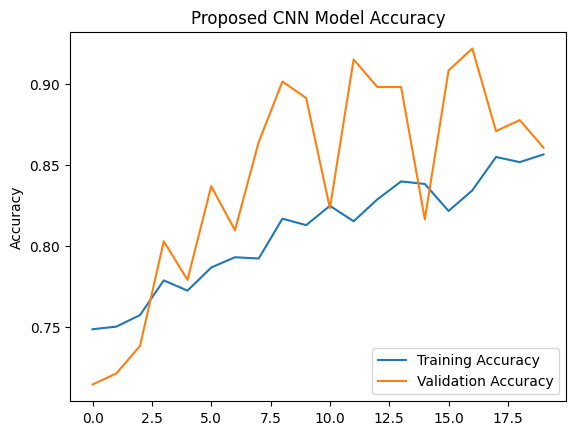

In [ ]:
acc = hist_cnn.history['accuracy']
val_acc = hist_cnn.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Proposed CNN Model Accuracy')
plt.show()

The model is exhibiting **normal behavior**, as both accuracies increase and the validation accuracy plateaus without significant degradation.

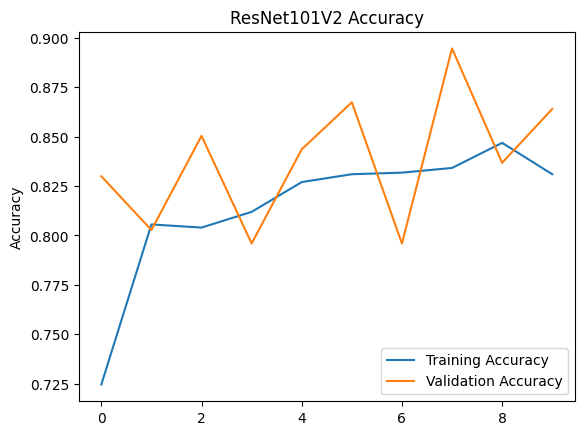

In [ ]:
acc = hist_res.history['accuracy']
val_acc = hist_res.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('ResNet101V2 Accuracy')
plt.show()

The model is exhibiting **normal behavior**, as both accuracies increase and the validation accuracy plateaus without significant degradation.

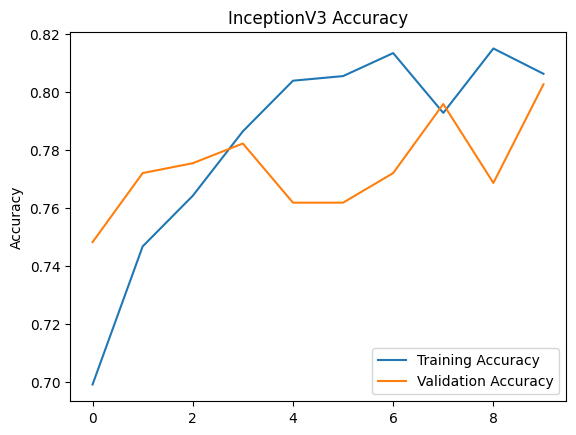

In [ ]:
acc = hist_inc.history['accuracy']
val_acc = hist_inc.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('InceptionV3 Accuracy')
plt.show()

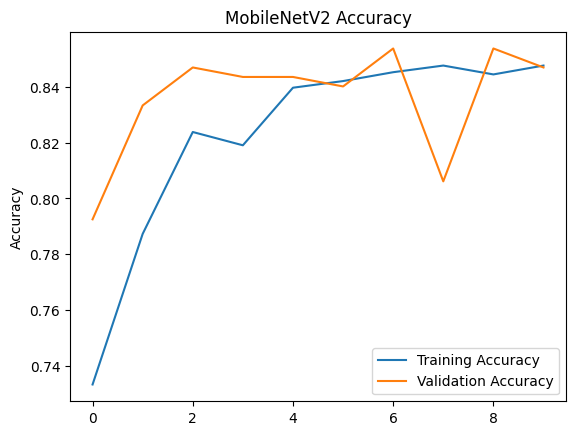

In [ ]:
acc = hist_mob.history['accuracy']
val_acc = hist_mob.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('MobileNetV2 Accuracy')
plt.show()

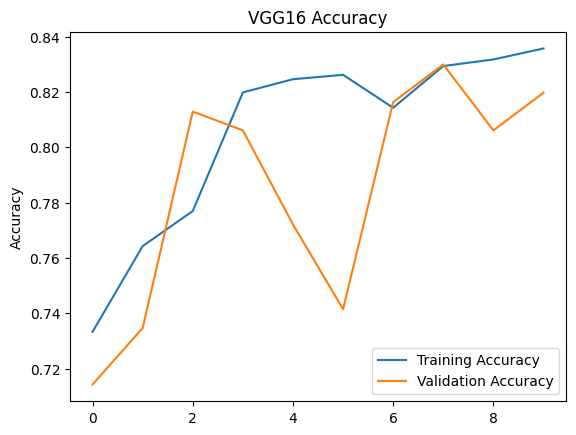

In [ ]:
acc = hist_vgg.history['accuracy']
val_acc = hist_vgg.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('VGG16 Accuracy')
plt.show()

## Loss Curves

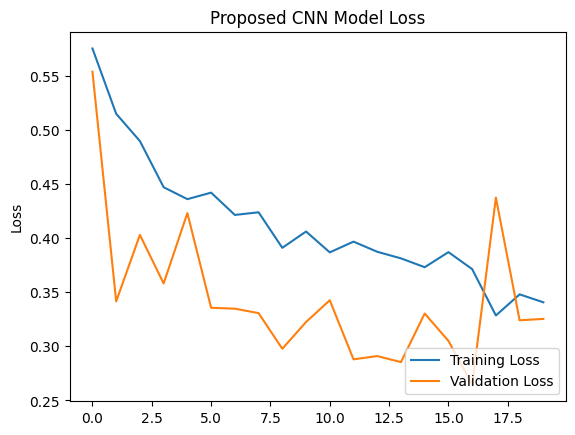

In [ ]:
acc = hist_cnn.history['loss']
val_acc = hist_cnn.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Proposed CNN Model Loss')
plt.show()

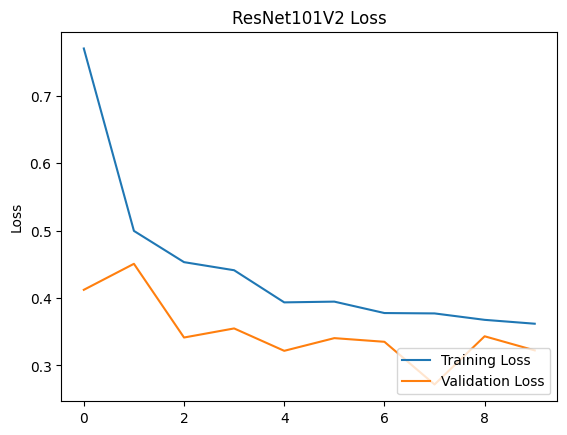

In [ ]:
acc = hist_res.history['loss']
val_acc = hist_res.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('ResNet101V2 Loss')
plt.show()

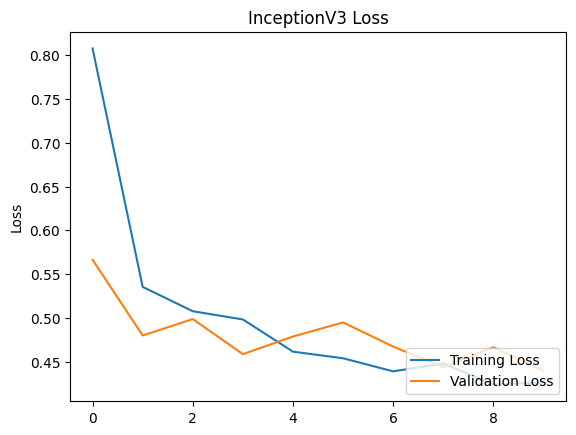

In [ ]:
acc = hist_inc.history['loss']
val_acc = hist_inc.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('InceptionV3 Loss')
plt.show()

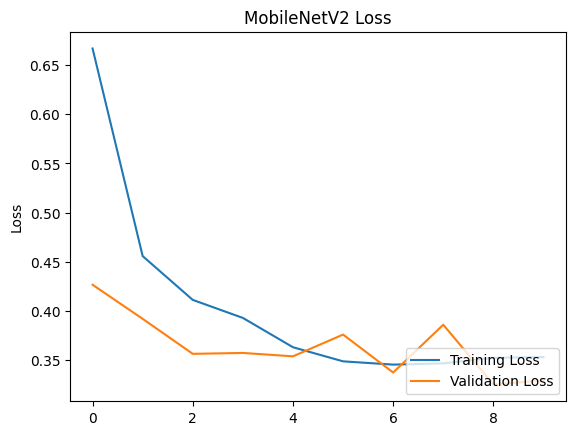

In [ ]:
acc = hist_mob.history['loss']
val_acc = hist_mob.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('MobileNetV2 Loss')
plt.show()

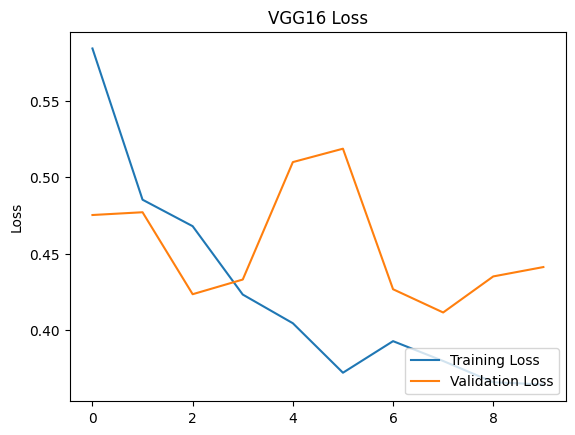

In [ ]:
acc = hist_vgg.history['loss']
val_acc = hist_vgg.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('VGG16 Loss')
plt.show()

## 2 Size (128 x 128)

## Accuracy Curves

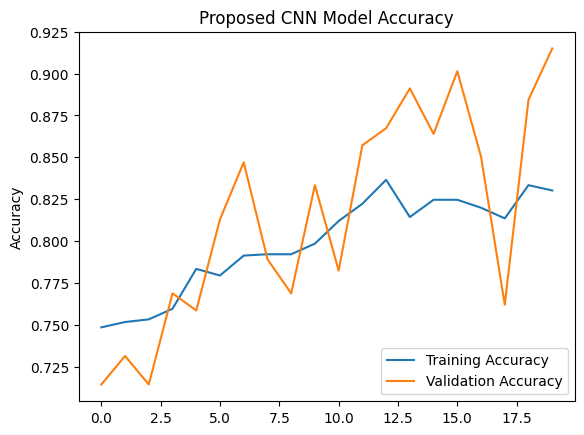

In [ ]:
acc = hist_cnn2.history['accuracy']
val_acc = hist_cnn2.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Proposed CNN Model Accuracy')
plt.show()

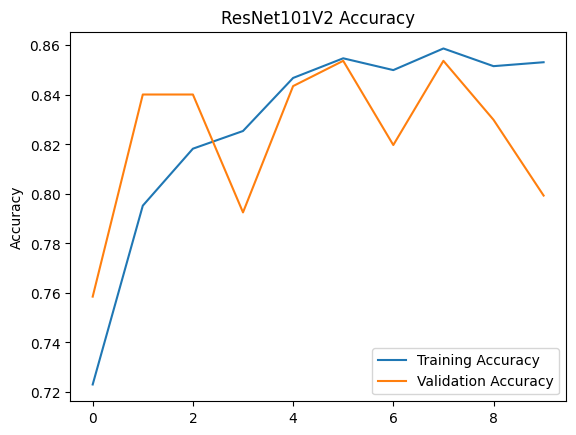

In [ ]:
acc = hist_res2.history['accuracy']
val_acc = hist_res2.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('ResNet101V2 Accuracy')
plt.show()

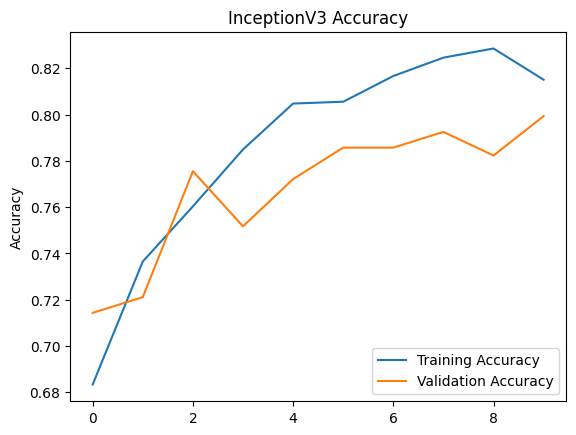

In [ ]:
acc = hist_inc2.history['accuracy']
val_acc = hist_inc2.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('InceptionV3 Accuracy')
plt.show()

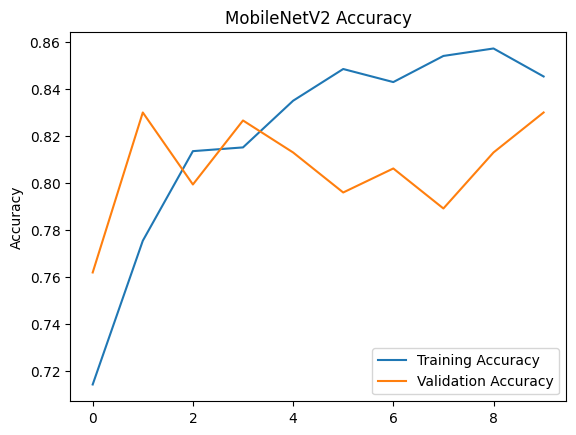

In [ ]:
acc = hist_mob2.history['accuracy']
val_acc = hist_mob2.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('MobileNetV2 Accuracy')
plt.show()

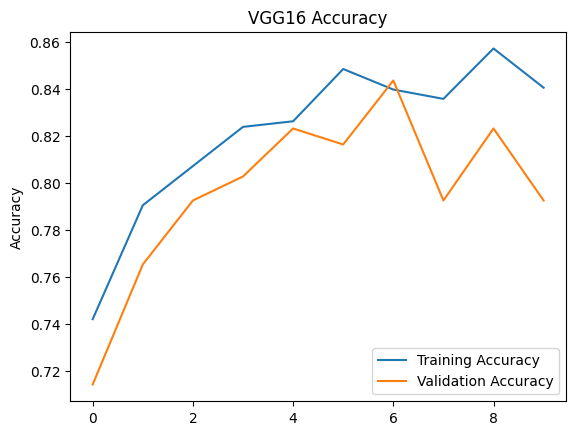

In [ ]:
acc = hist_vgg2.history['accuracy']
val_acc = hist_vgg2.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('VGG16 Accuracy')
plt.show()

## Loss Curves

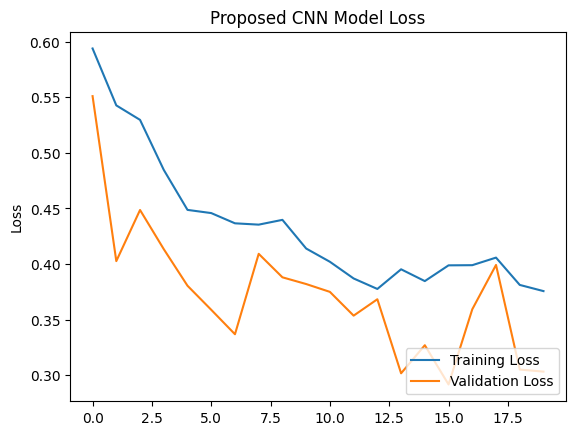

In [ ]:
acc = hist_cnn2.history['loss']
val_acc = hist_cnn2.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Proposed CNN Model Loss')
plt.show()

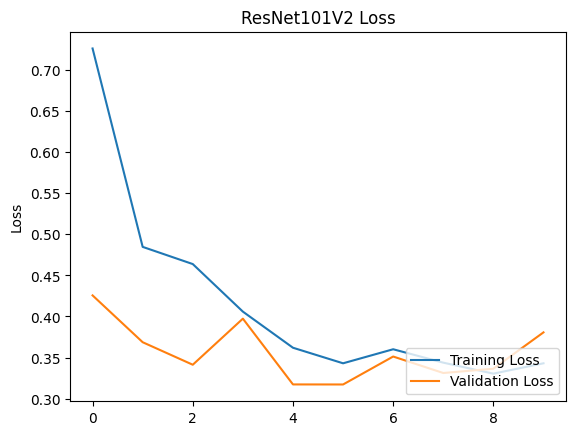

In [ ]:
acc = hist_res2.history['loss']
val_acc = hist_res2.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('ResNet101V2 Loss')
plt.show()

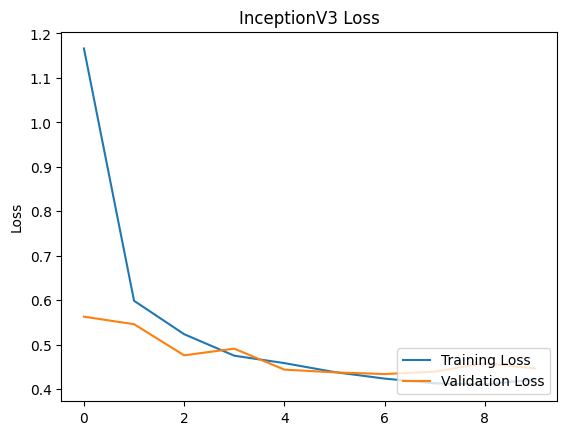

In [ ]:
acc = hist_inc2.history['loss']
val_acc = hist_inc2.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('InceptionV3 Loss')
plt.show()

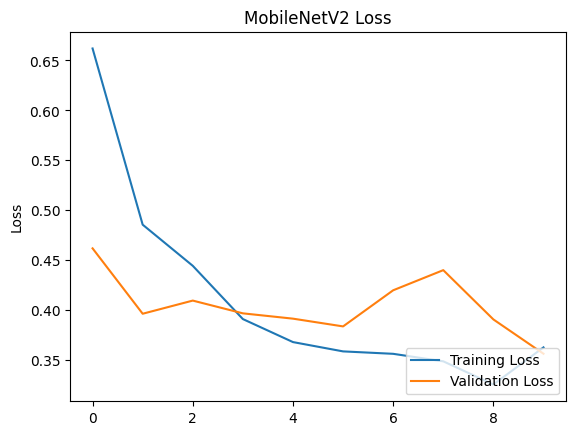

In [ ]:
acc = hist_mob2.history['loss']
val_acc = hist_mob2.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('MobileNetV2 Loss')
plt.show()

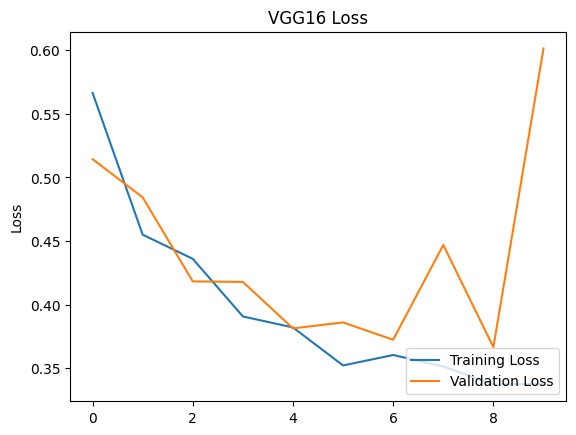

In [ ]:
acc = hist_vgg2.history['loss']
val_acc = hist_vgg2.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('VGG16 Loss')
plt.show()

## 3 Size (192 x 192)

## Accuracy Curves

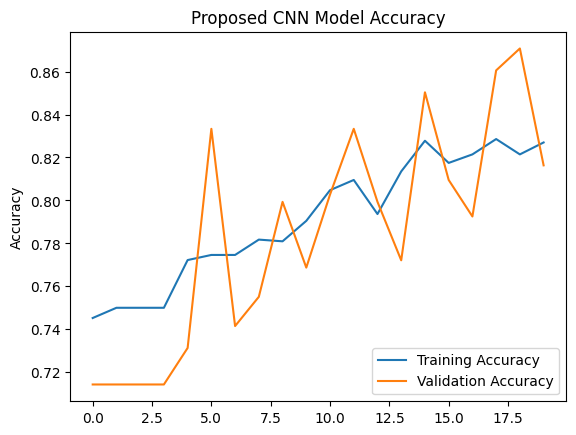

In [ ]:
acc = hist_cnn3.history['accuracy']
val_acc = hist_cnn3.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Proposed CNN Model Accuracy')
plt.show()

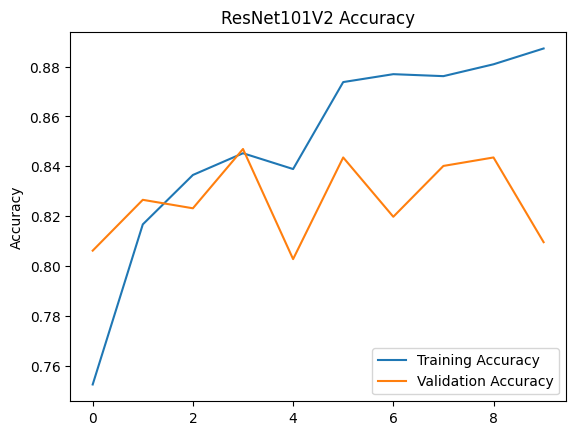

In [ ]:
acc = hist_res3.history['accuracy']
val_acc = hist_res3.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('ResNet101V2 Accuracy')
plt.show()

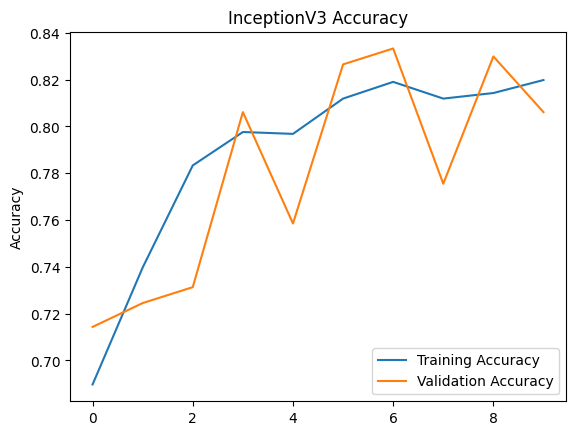

In [ ]:
acc = hist_inc3.history['accuracy']
val_acc = hist_inc3.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('InceptionV3 Accuracy')
plt.show()

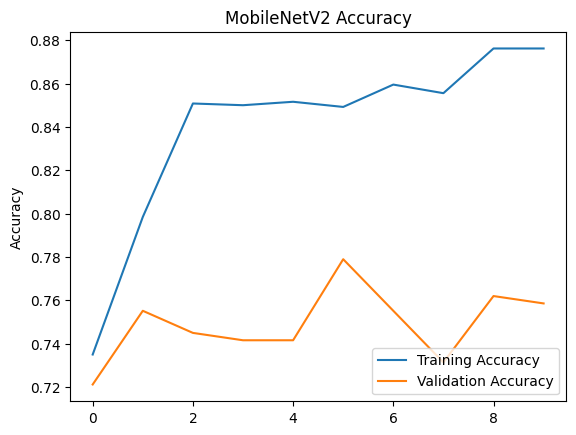

In [ ]:
acc = hist_mob3.history['accuracy']
val_acc = hist_mob3.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('MobileNetV2 Accuracy')
plt.show()

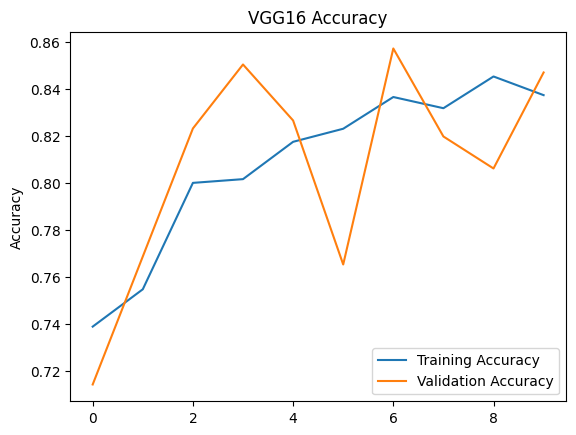

In [ ]:
acc = hist_vgg3.history['accuracy']
val_acc = hist_vgg3.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('VGG16 Accuracy')
plt.show()

## Loss Curves

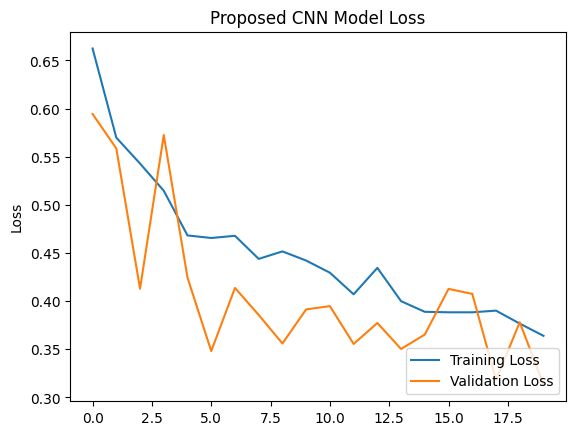

In [ ]:
acc = hist_cnn3.history['loss']
val_acc = hist_cnn3.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('Proposed CNN Model Loss')
plt.show()

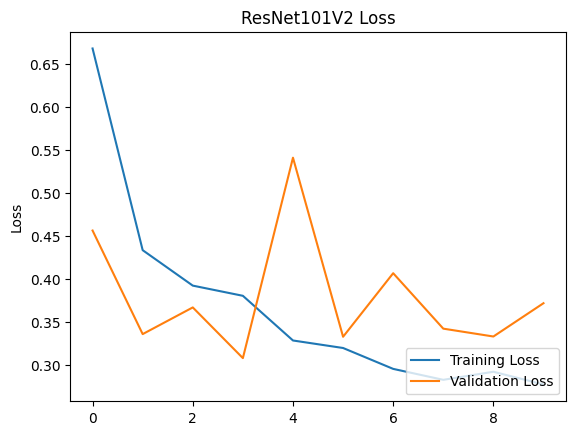

In [ ]:
acc = hist_res3.history['loss']
val_acc = hist_res3.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('ResNet101V2 Loss')
plt.show()

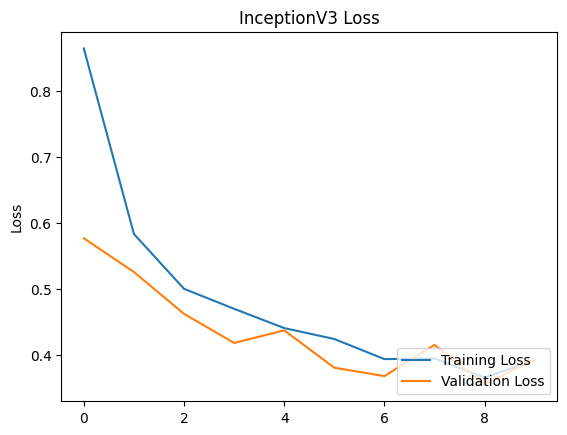

In [ ]:
acc = hist_inc3.history['loss']
val_acc = hist_inc3.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('InceptionV3 Loss')
plt.show()

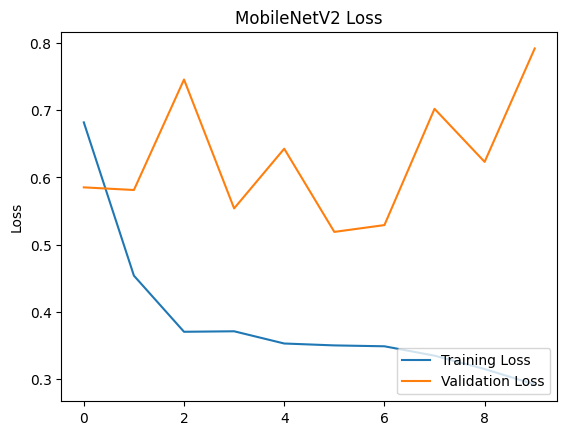

In [ ]:
acc = hist_mob3.history['loss']
val_acc = hist_mob3.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('MobileNetV2 Loss')
plt.show()

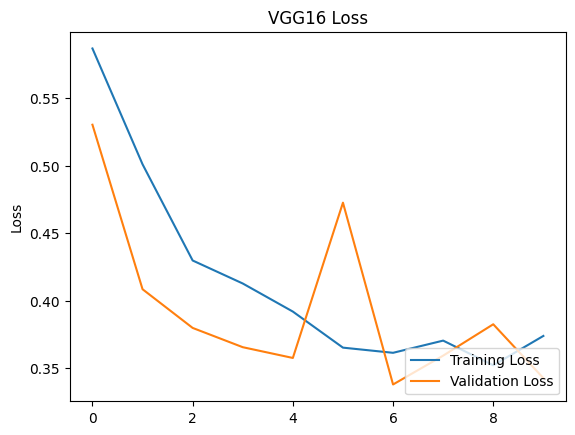

In [ ]:
acc = hist_vgg3.history['loss']
val_acc = hist_vgg3.history['val_loss']

plt.plot(acc, label='Training Loss')
plt.plot(val_acc, label='Validation Loss')
plt.legend(loc='lower right')
plt.ylabel('Loss')
plt.ylim([min(plt.ylim()),max(plt.ylim())])
plt.title('VGG16 Loss')
plt.show()